In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = False)

In [ ]:
y = mnist['target']
y = np.array(y, dtype = 'int8')
X = mnist['data']

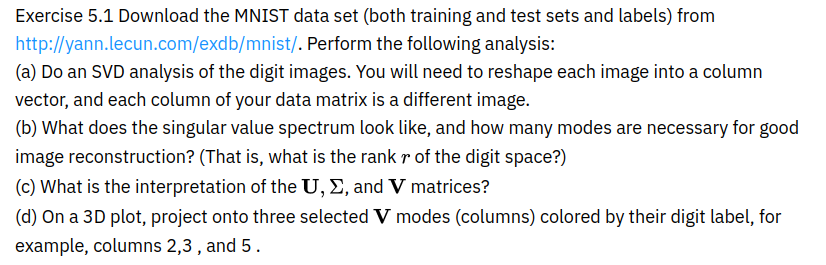

In [ ]:
def plot_digit(image_data):
    plt.imshow(image_data, cmap = "binary")
    plt.title("Sample digit plot")
    plt.axis("off")

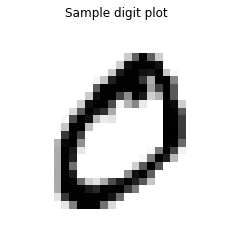

In [ ]:
sample = 1 #Change sample number for different digits
sample_digit = X[sample]/255.0
sample_digit = np.reshape(sample_digit, [28,28])
U, S, VT = np.linalg.svd(sample_digit, full_matrices=True) #I understand the question as SVD on a single digit, not the dataset.
Sd = np.diag(S)
plot_digit(sample_digit)

In [ ]:
def err_SVD(r):
    Xapprox = U[:,:r] @ Sd[0:r,:r] @ VT[:r,:]
    err = np.linalg.norm(sample_digit - Xapprox, 'fro')/ np.linalg.norm(sample_digit, 'fro')
    var = err*err
    return(err, var)

Text(0.5, 0, 'No')

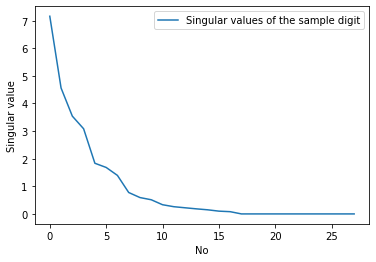

In [ ]:
plt.plot(S)
plt.legend(["Singular values of the sample digit"])
plt.ylabel("Singular value")
plt.xlabel("No")

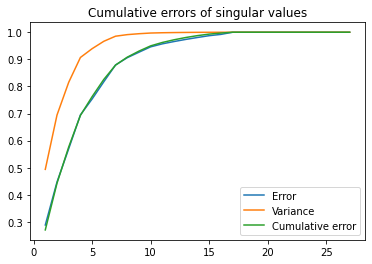

In [ ]:
Err = []
Var = []
Cumsum = []
r_val = []
for i in range(1, 28, 1):
    err, var = err_SVD(i)
    Err.append(1-err)
    Var.append(1-var)
    Cumsum.append(np.cumsum(np.diag(Sd))[i-1]/np.sum(np.diag(Sd)))
    r_val.append(i)
plt.plot(r_val, Err)
plt.plot(r_val, Var)
plt.plot(r_val, Cumsum)
plt.title("Cumulative errors of singular values")
plt.legend(["Error", "Variance", "Cumulative error"])

To reconstruct, first 5 modes capture almost 90% of the image, we can pick looking at the graph above.

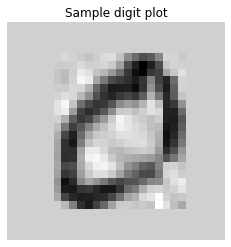

In [ ]:
X5 = U[:,:5] @ Sd[0:5,:5] @ VT[:5,:]
plot_digit(X5) 
#Plot of sample digit with first 5 modes.

In [ ]:
#(c) Interpretations
#Interpretation of Singular values matrix can be seen from the illustration above, it can be used to measure the amount of "energy" captured.

#Each column of matrix U is a principal component of the original matrix ordered by importance

#And matrix VT can be seen as scales 

In [ ]:
#(d) I don't really understand the question in this one


Once you have performed the above and have your data projected into PCA space, you will build a classifier to identify individual digits in the training set.

(e) Pick two digits. See if you can build a linear classifier (LDA) that can reasonably identify them.

(f) Pick three digits. Try to build a linear classifier to identify these three now.

(g) Which two digits in the data set appear to be the most difficult to separate? Quantify the accuracy of the separation with LDA on the test data.

(h) Which two digits in the data set are most easy to separate? Quantify the accuracy of the separation with LDA on the test data.

(i) SVM (support vector machines) and decision tree classifiers were the state of the art until about 2014. How well do these separate between all 10 digits?

(j) Compare the performance between LDA, SVM, and decision trees on the hardest and easiest pair of digits to separate (from above).

Make sure to discuss the performance of your classifier on both the training and test sets.

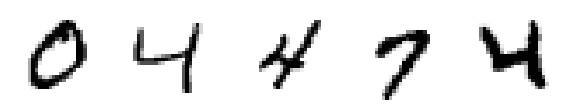

In [ ]:
two_digits = (y==0) + (y==6)
three_digits = (y==0) + (y==7) + (y==4)
X2d, y2d = X[two_digits,:], y[two_digits]  # picking dataset of 1, 7  only
X3d, y3d = X[three_digits,:], y[three_digits] # picking dataset of 0,7,4 only

f, ax = plt.subplots(1, 5, figsize=(10,10))
for i in range(5):
    ax[i].imshow(X3d[i,:].reshape(28,28), cmap = 'binary')
    ax[i].axis("off")

In [ ]:
LDA2d = LinearDiscriminantAnalysis()
X_train2d, X_test2d, y_train2d, y_test2d = train_test_split(X2d, y2d, test_size = 0.2, shuffle = True)
LDA2d.fit(X_train2d, y_train2d)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = LDA2d.predict(X_test2d)
accuracy = (y_pred == y_test2d).sum()/len(y_pred)
print("Accuracy is " , accuracy)

Accuracy is  0.9840348330914369


In [ ]:
LDA3d = LinearDiscriminantAnalysis()
X_train3d, X_test3d, y_train3d, y_test3d = train_test_split(X3d, y3d, test_size = 0.2, shuffle = True)
LDA3d.fit(X_train3d, y_train3d)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = LDA3d.predict(X_test3d)
accuracy = (y_pred == y_test3d).sum()/len(y_pred)
print("Accuracy is " , accuracy)

Accuracy is  0.9802568981921979


LDA seems to predict reasonable, 99.3% for 2 digits case, and 98.2% for 3 digits case

0 and 6 seems to be more difficult to identify, I got less accuracy for these two, 98%

In [ ]:
SVM = SVC(probability=True)
DT = DecisionTreeClassifier()
X_train_, X_test_, y_train_, y_test_ = train_test_split(X[:5000,:], y[:5000], 
                                                        test_size=0.2, shuffle=True)
SVM.fit(X_train_, y_train_)
DT.fit(X_train_, y_train_)

DecisionTreeClassifier()